<a href="https://colab.research.google.com/github/MysterionNY/Kurs259_Machine_Learning/blob/main/demos/04_clustering_with_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering
<a target="_blank" href="https://colab.research.google.com/github/LuWidme/uk259/edit/main/demos/04_Clustering_with_KMeans.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

The aim of clustering is to automatically find groups of similar datapoints in unlabeled data. In this exercise, your aim will be to implement the k-Means algorithm and apply it to a set of random data.



## Task Implement the KMeans algorithm

Input:

* A 2D array of features

* A number of groups (nGroups)

Output:

* A 1D array of estimated group membership for each point
* Coordinates of the cluster centers

### Step by Step guide to developing this algorithm:





1.  **Initialize** :
Start by initializing an array of 2D points called clusterCenters. It should have the length nGroups. You can initialize them however you want. The easiest starting point for now is to hardcode them (e.g., [0, 0]). Initialize a list of the same length as the featureArray called clusterAssignments to track cluster membership of each point. You can use the np.empty() function for this.



2. **Assign Points to Clusters**: Loop through each point and calculate the distance to every cluster center. You can define your own function using Pythagorean math or use the predefined metric of scikit-learn. Assign each point to its closest cluster by updating clusterAssignments at the respective index. Print the closest cluster center for each point as an intermediate result.



3. **Update Cluster Centers**: Recalculate all clusterCenters by averaging the coordinates of all the points in a given cluster. For example, if the 2 points in cluster one have the coordinates [1,1] and [2,2], the cluster center should have the updated coordinates [1.5, 1.5]. Print the updated cluster center coordinates as an intermediate result.


> Tipp: You can use `numpy.average` to easily average the coordinates by using the `axis` optional paramter




4. Repeat steps 2 and 3 for a fixed number of iterations (e.g. 25 times).

5. Return the clusterAssignments and clusterCenters.



**This is a very basic implementation of the kMeans algorithm.**


**Now use the clusterAssignments and clusterCenters variables to visualize your results.**

---


## Improvements
Next, try to improve it by adding some or all of the following:

* Try to think of a strategy to initialize the cluster centers more intelligently, instead of hardcoding the startpoints.
* Make the number of cluster centers dynamic (equal to nGroups)
* Visualize intermediate results (you could produce a GIF similar to the one in the presentation.)
* Choose a better strategy to stop the loop in point 4 (e.g. change the foor-loop for a while loop that ends when the cluster centers don't change (much) anymore)

* Optimal K: Try to implement a strategy to automatically choose an optimal number of clusters. Research-Tip: "Elbow Method"

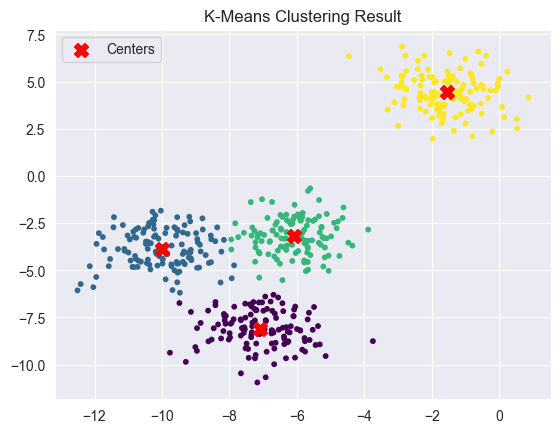

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate the dataset
features, true_labels = make_blobs(
    n_samples=500,
    centers=4,
    cluster_std=1,
    random_state=1
)

# Step 1: Initialize cluster centers and assignments
def initialize_centers(features, n_groups):
    # Randomly pick initial cluster centers from the dataset
    indices = np.random.choice(features.shape[0], n_groups, replace=False)
    return features[indices]

def assign_clusters(features, cluster_centers):
    cluster_assignments = np.empty(features.shape[0], dtype=int)
    for i, point in enumerate(features):
        distances = np.linalg.norm(point - cluster_centers, axis=1)
        cluster_assignments[i] = np.argmin(distances)
    return cluster_assignments

def update_centers(features, cluster_assignments, n_groups):
    new_centers = np.array([
        features[cluster_assignments == k].mean(axis=0)
        for k in range(n_groups)
    ])
    return new_centers

# Step 2–4: Run k-means algorithm
def k_means(features, n_groups, max_iter=25):
    cluster_centers = initialize_centers(features, n_groups)
    for _ in range(max_iter):
        cluster_assignments = assign_clusters(features, cluster_centers)
        new_centers = update_centers(features, cluster_assignments, n_groups)
        # Stop if centers do not change significantly
        if np.allclose(cluster_centers, new_centers, atol=1e-4):
            break
        cluster_centers = new_centers
    return cluster_assignments, cluster_centers

# Run the algorithm
n_groups = 4
cluster_assignments, cluster_centers = k_means(features, n_groups)

# Visualization
fig, ax = plt.subplots()
scatter = ax.scatter(features[:, 0], features[:, 1], c=cluster_assignments, s=10, cmap='viridis')
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=100, marker='X', label='Centers')
ax.set_title("K-Means Clustering Result")
ax.legend()
plt.show()


In [29]:
import numpy as np


def k_means(featureArray, nGroups, max_iter=25):
    # Schritt 1: Initialisiere Clusterzentren zufällig aus den Datenpunkten
    indices = np.random.choice(featureArray.shape[0], nGroups, replace=False)
    cluster_centers = featureArray[indices]

    for _ in range(max_iter):
        # Schritt 2: Weise Punkte zu dem nächsten Cluster zu
        distances = np.linalg.norm(featureArray[:, np.newaxis] - cluster_centers, axis=2)
        cluster_assignments = np.argmin(distances, axis=1)

        # Schritt 3: Aktualisiere die Clusterzentren
        new_centers = np.array([
            featureArray[cluster_assignments == k].mean(axis=0) if np.any(cluster_assignments == k) else
            cluster_centers[k]
            for k in range(nGroups)
        ])

        # Abbruchbedingung: Wenn sich die Zentren kaum ändern
        if np.allclose(cluster_centers, new_centers, atol=1e-4):
            break

        cluster_centers = new_centers

    return cluster_assignments, cluster_centers


In [30]:
# apply k means to your dataset to cluster the data

estimated_labels, cluster_centers = k_means(features, 4)

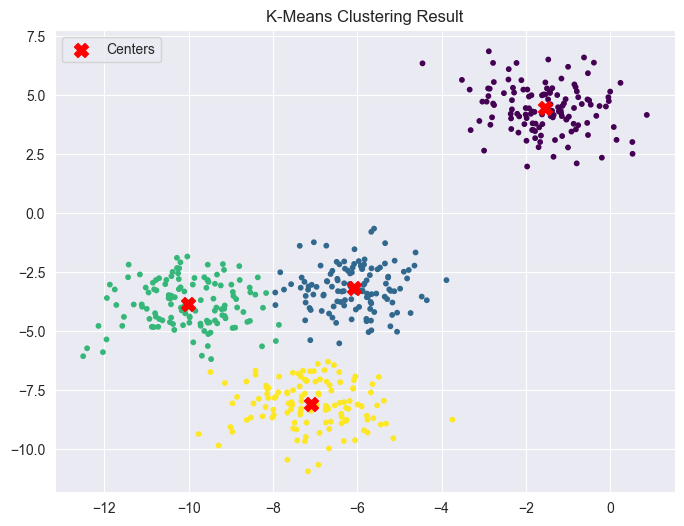

In [31]:
# visualize your results
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(features[:, 0], features[:, 1], c=estimated_labels, s=10, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=100, marker='X', label='Centers')
plt.title("K-Means Clustering Result")
plt.legend()
plt.show()
